<a href="https://colab.research.google.com/github/Hyun-s/MLstudy/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


## Data preprocessing

In [ ]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

In [ ]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset =dataset.dropna()

In [ ]:
origin = dataset.pop('Origin')

In [ ]:
dataset.head(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70


In [ ]:
train_dataset = dataset.sample(frac = 0.8,random_state= 0)
test_dataset = dataset.drop(train_dataset.index)


In [ ]:
def norm(x):
  return (x-train_stats['mean'])/train_stats['std']
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')
normed_train_data =norm(train_dataset)
normed_test_data = norm(test_dataset)


# Make Model

In [ ]:
inputs = keras.Input(shape=(train_dataset.shape[1],))
h = layers.Dense(64)(inputs)
h = layers.Dense(64)(h)
outputs = layers.Dense(1)(h)

In [ ]:
model = keras.Model(inputs = inputs,outputs = outputs)

In [ ]:
model.compile(loss='mse',
              optimizer = tf.keras.optimizers.RMSprop(0.001),
              metrics=['mse'])

In [ ]:
model.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


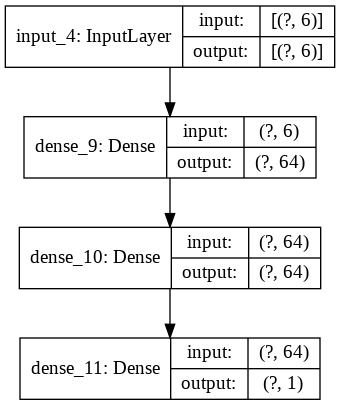

In [ ]:
keras.utils.plot_model(model,"my_first_model.png",show_shapes=True)

# Learning

In [ ]:
EPOCHS = 100

history = model.fit(
    normed_train_data,train_labels,
    epochs = EPOCHS , validation_split=0.2
)

Epoch 1/100
8/8 [==============================] - 0s 14ms/step - loss: 13.2654 - mse: 13.2654 - val_loss: 11.7078 - val_mse: 11.7078
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 12.6382 - mse: 12.6382 - val_loss: 11.9344 - val_mse: 11.9344
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 12.3436 - mse: 12.3436 - val_loss: 11.8661 - val_mse: 11.8661
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 12.6355 - mse: 12.6355 - val_loss: 12.1242 - val_mse: 12.1242
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 12.5513 - mse: 12.5513 - val_loss: 11.8574 - val_mse: 11.8574
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 12.7011 - mse: 12.7011 - val_loss: 11.8960 - val_mse: 11.8960
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 12.5200 - mse: 12.5200 - val_loss: 11.5353 - val_mse: 11.5353
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - los

In [ ]:
loss = model.evaluate(normed_test_data,test_labels,verbose=2)

print("{:5.5f} MPG".format(loss))

3/3 - 0s - loss: 11.0346
11.03460 MPG


# Learning visualization

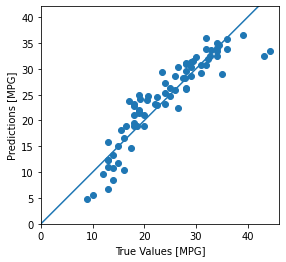

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

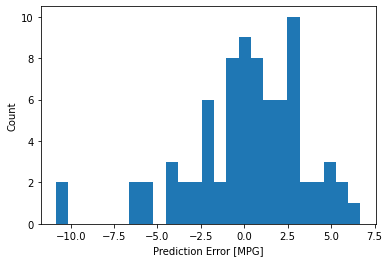

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

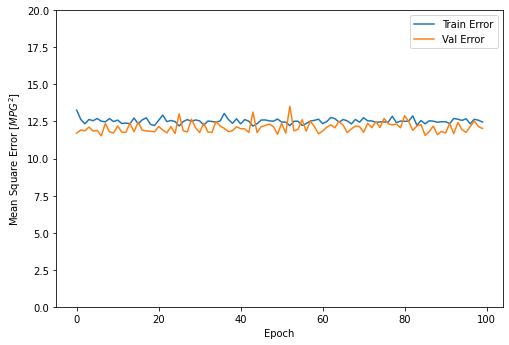

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))


  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)